# Human Activity Recognition Using Smart Phone Data

## Import libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import pylab as pl
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings('ignore')

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


## Load the data set

In [2]:
path = "Human_Activity_Recognition_using_smart_phone_data.csv"
df = pd.read_csv(path)
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [3]:
df.shape

(10299, 562)

## Check for columns names, data types, missing values, duplicates and number of unique values

In [4]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['Missing:np.nan'] = (df.isnull()).sum()
    summary_df['Missing:None'] = (df == "None").sum()
    summary_df['total'] =  summary_df['Missing:np.nan'] + summary_df['Missing:None']
    summary_df['Percent'] = 100*summary_df['total']/len(df)
    summary_df['Duplicates'] = df.duplicated().sum()
    summary_df['Unique'] = df.nunique().values
    summary_df['Count'] = df.count().values
    return summary_df.sort_values(ascending = False, by = 'Percent')

summary(df).style.background_gradient(cmap='Blues')



,dtypes,Missing:np.nan,Missing:None,total,Percent,Duplicates,Unique,Count
tBodyAcc-mean()-X,float64,0,0,0,0.000000,0,10292,10299
fBodyAccJerk-skewness()-Y,float64,0,0,0,0.000000,0,10299,10299
fBodyAccJerk-maxInds-Z,float64,0,0,0,0.000000,0,51,10299
fBodyAccJerk-meanFreq()-X,float64,0,0,0,0.000000,0,10298,10299
fBodyAccJerk-meanFreq()-Y,float64,0,0,0,0.000000,0,10299,10299
fBodyAccJerk-meanFreq()-Z,float64,0,0,0,0.000000,0,10298,10299
fBodyAccJerk-skewness()-X,float64,0,0,0,0.000000,0,10298,10299
fBodyAccJerk-kurtosis()-X,float64,0,0,0,0.000000,0,10299,10299
fBodyAccJerk-kurtosis()-Y,float64,0,0,0,0.000000,0,10298,10299
fBodyAccJerk-maxInds-X,float64,0,0,0,0.000000,0,49,10299


### The data set is perfectly clean :)

### Explore the distribution of the target

In [4]:
df["Activity"].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

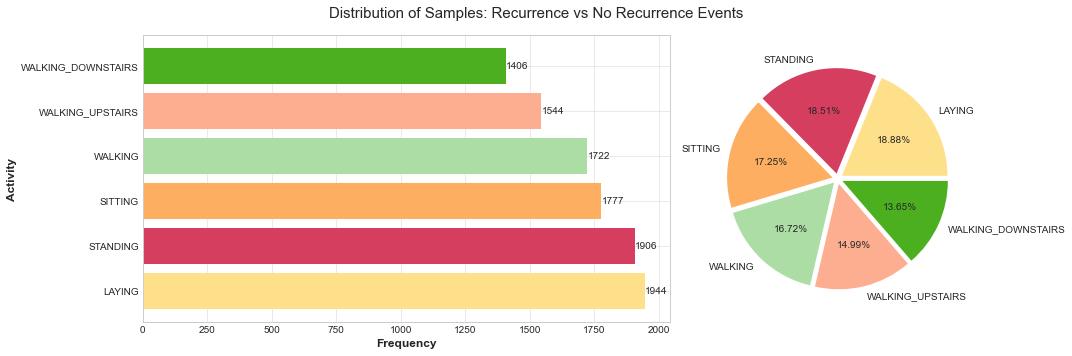

In [5]:
y = df['Activity'].value_counts()
colors = [ "#fee08b" ,"#d53e5f","#fdae61", "#abdda4" ,"#fdae91" ,"#4CAF20" ]
figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[2,1]})


axes[0].barh(y=y.index, width=y.values, color=colors)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Activity')
axes[0].grid(alpha=0.5)
for index, values in enumerate(y):
    axes[0].text(values+1, index, str(values), va='center')

axes[1].pie(y.values, labels=y.index, autopct='%.2f%%', explode=([0.05]*len(y.index)), colors=colors)

    

figure.suptitle('Distribution of Target', fontsize=15)
plt.tight_layout(pad=1)
plt.show()


### Mutual Information Score

In [6]:
y = df[['Activity']]
x = df.drop(['Activity'], axis = 1)

In [7]:
discrete_features = x.dtypes == int

In [8]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(x,y,discrete_features):
    mi_scores = mutual_info_classif(x,y,discrete_features =discrete_features )
    mi_scores = pd.Series(mi_scores, name = "MI Scores", index = x.columns)
    mi_scores = mi_scores.sort_values(ascending = False)
    return mi_scores
mi_scores =  make_mi_scores(x,y,discrete_features) 
mi_scores

tBodyAcc-max()-X               0.998800
tBodyAccJerk-max()-X           0.929428
tBodyAccMag-max()              0.914908
tGravityAccMag-max()           0.914878
tBodyAccJerk-max()-Y           0.888994
                                 ...   
tBodyAcc-arCoeff()-Y,4         0.015675
tBodyGyroJerk-arCoeff()-Y,4    0.014917
tBodyGyroJerk-arCoeff()-X,4    0.014203
tBodyGyroJerkMag-arCoeff()3    0.012229
tBodyAccJerkMag-arCoeff()3     0.009026
Name: MI Scores, Length: 561, dtype: float64

### Train-Test Split

In [9]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1,shuffle =True)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 3090
number of training samples: 7209


### Helper function
* This function will be used to plot confution matrix and classification report

In [19]:
from sklearn import metrics

def clf_plot(y_pred) :
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(2, 1, figsize=(11, 15))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu', ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=20)
    ax[0].xaxis.set_ticklabels([1,2,3,4,5,6])
    ax[0].yaxis.set_ticklabels([1,2,3,4,5,6])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='YlGnBu', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=20)
    plt.show()

### Random Forest Classifier

In [12]:
# RFC
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=22, n_estimators=100, random_state=1).fit(x_train, y_train)
yhat_test = rfc.predict(x_test)

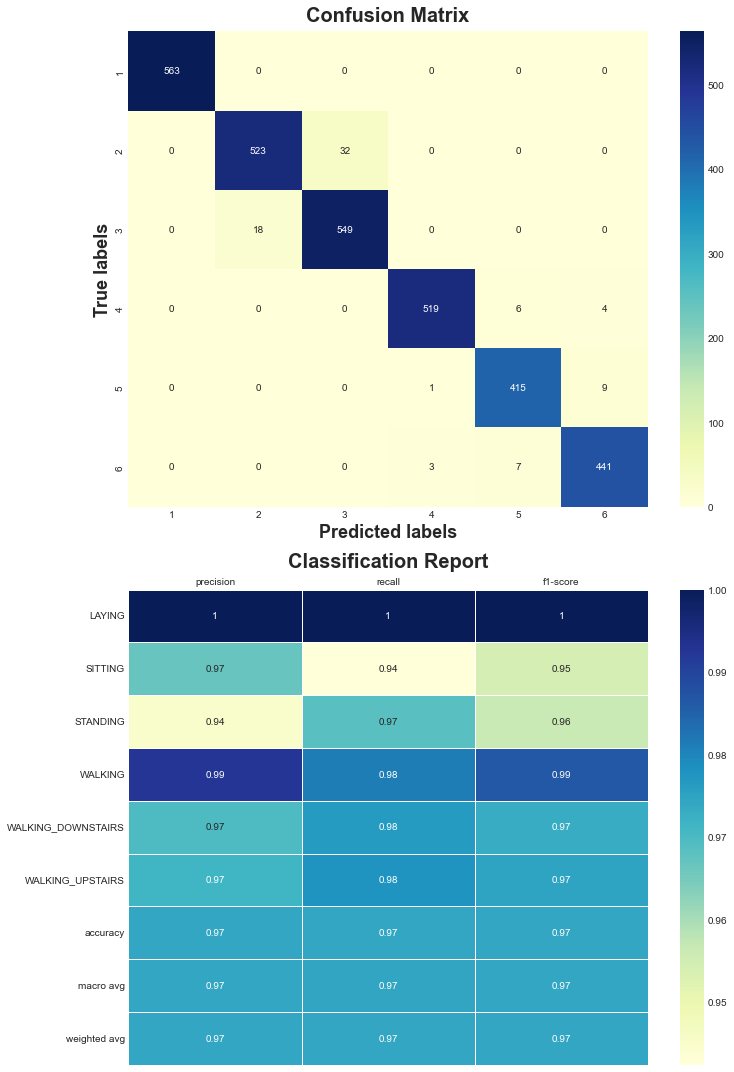

In [20]:
clf_plot(yhat_test)

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [22]:

yhat_train = lr.predict(x_train)
yhat_test = lr.predict(x_test)

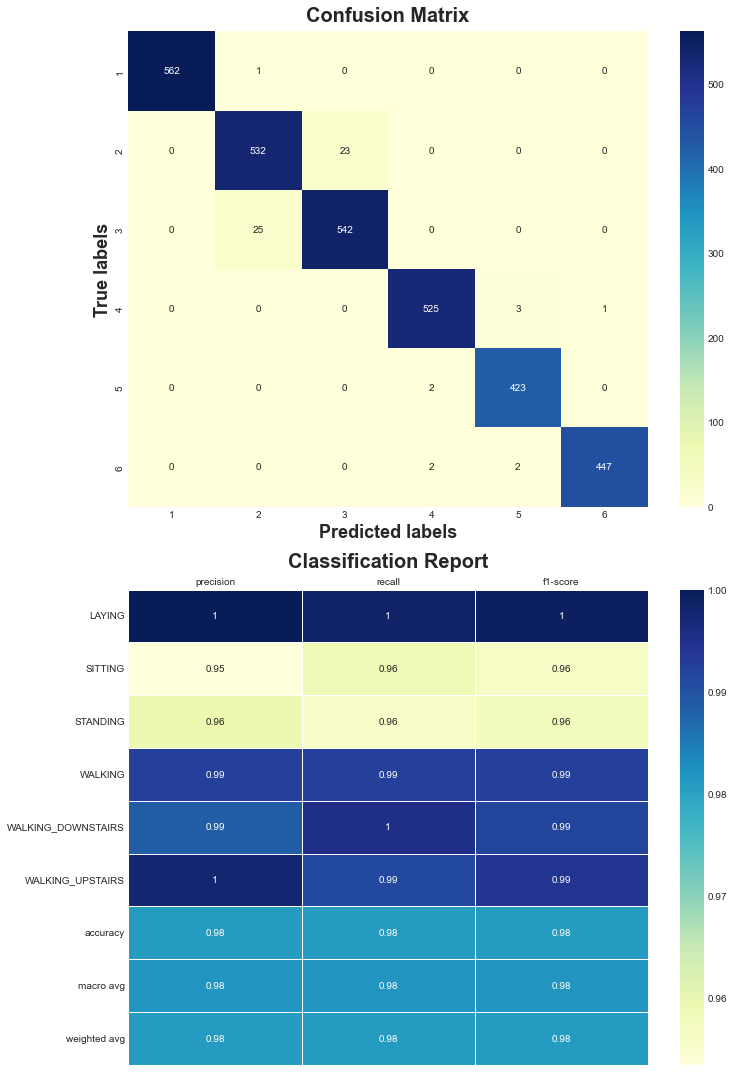

In [23]:
clf_plot(yhat_test)

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=122)

tree.fit(x_train, y_train)



DecisionTreeClassifier(random_state=122)

In [26]:
yhat_train = tree.predict(x_train)
yhat_test = tree.predict(x_test)

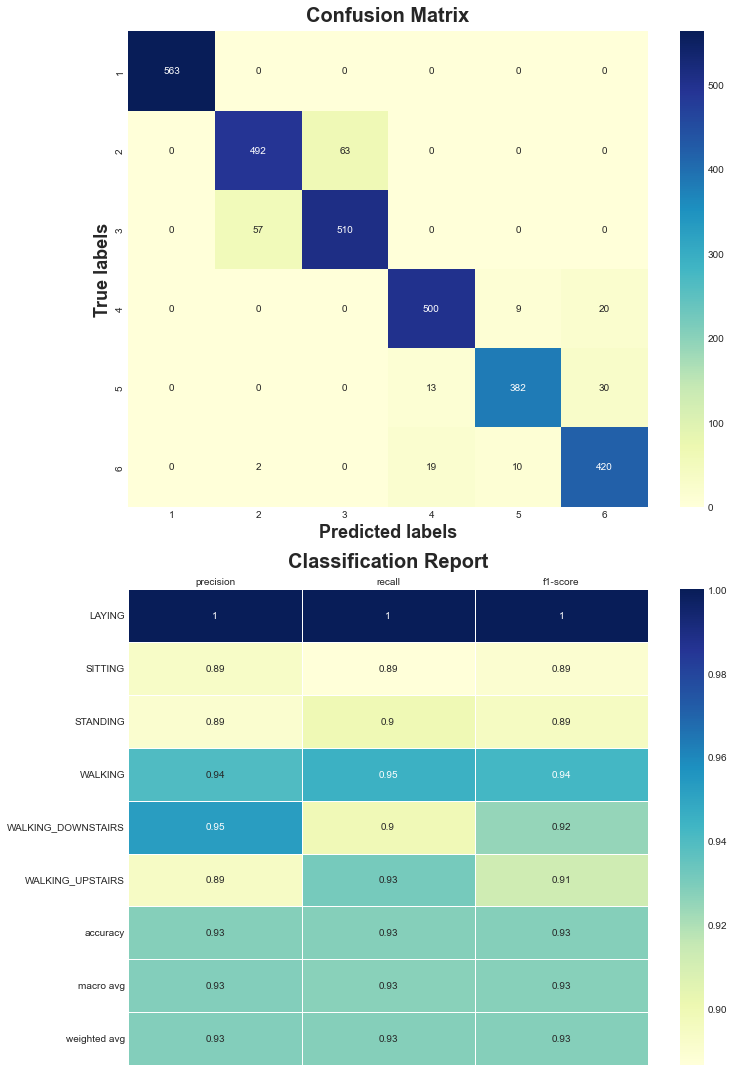

In [27]:
clf_plot(yhat_test)

### K-Neighbors Classifier

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# create the KNN classifier
knn = KNeighborsClassifier()


knn.fit(x_train, y_train)



KNeighborsClassifier()

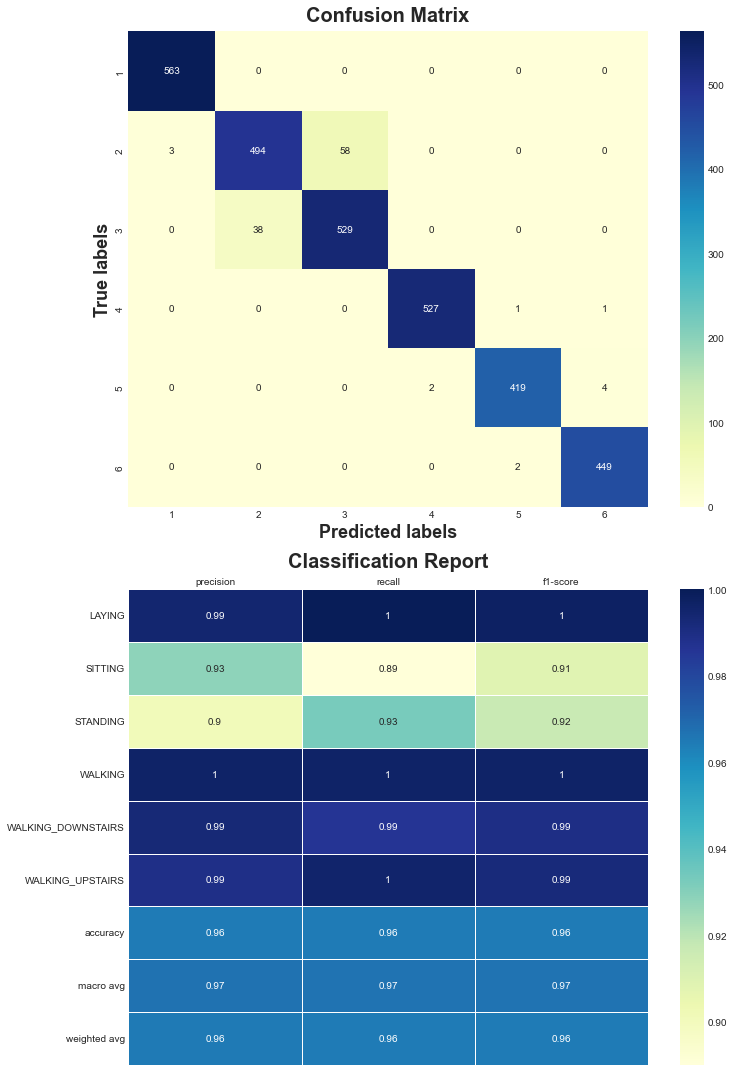

In [29]:
yhat_train = knn.predict(x_train)
yhat_test = knn.predict(x_test)
clf_plot(yhat_test)

### Conclusion

### Based on the above output, best algorithm base on F1 Score is : Logistic Regression

---
# END
Thank you :)